# WeatherPy
----

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output CSV and log files
output_data_file = "Output_Files/cities.csv"
logfile = "Output_Files/weather.log"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
---
* Use Numpy to Generate Random Coordinates in the Specified Lat and Long Ranges
* Use Citipy to Pull City Names by the Coordinates Gathered in the First Step

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
in_cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    in_city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
# If the city is unique, then add it to a our cities list
    if in_city not in in_cities:
        in_cities.append(in_city)
# Print the city count to confirm sufficient count
len(in_cities)

612

## Perform API Calls
---
* Stage Variables Used for Output
* Loop Through Cities and Perform API Calls For Weather Data
* Write Progess to Output File and Diplay Progress.

In [3]:
#Message variables for log file
startmsg = "Begining Data Retrieval"
endmsg = "Data Retrieval Complete"
dashes = "-----------------------------"

In [4]:
#Initialize list and count variables
out_cities = []   
count = 0
#Open logfile and begin writing and displaying the log output
with open (logfile, "w") as f:
    print(startmsg + "\n" + dashes)
    f.write(startmsg + "\n" + dashes + "\n")
#Loop through the cities in the cities list
    for in_city in in_cities:
#Set up the api url and parameters
        r = requests.get("http://api.openweathermap.org/data/2.5/weather", params = {
            "appid": api_key,
            "q": in_city,
            "units": "Imperial"
            })
#Increase count by 1 and create a percent message to keep track of progress
        count += 1
        percentmsg = str('%.2f'%((count / len(in_cities)) * 100)) + "% Complete"
#If statement to only process cities that are found and skip cities that are not found
        if r.status_code == 200:
            out_city = r.json()
            out_cities.append(out_city)
#Print and write the logfile progress of successful result
            print("Processing Data for City: " + out_city["name"] + " | " + str(out_city["id"]) + " | " + percentmsg)
            f.write("Processing Data for City: " + out_city["name"] + " | " + str(out_city["id"]) \
                                    + " | " + percentmsg + "\n")
        else:
#Print and write the logfile progress of unsuccessful result
            print("*** City Not Found. Skipping | " + percentmsg + " ***")
            f.write("*** City Not Found. Skipping | " + percentmsg + " ***" + "\n") 
#Print and write that all the city data has been processed
    print(dashes + "\n" + endmsg + "\n" + dashes)
    f.write(dashes + "\n" + endmsg + "\n" + dashes + "\n")
#Close the logfile
    f.close()
    

Begining Data Retrieval
-----------------------------
Processing Data for City: Busselton | 2075265 | 0.16% Complete
Processing Data for City: Medicine Hat | 6071618 | 0.33% Complete
Processing Data for City: Hermanus | 3366880 | 0.49% Complete
Processing Data for City: Rikitea | 4030556 | 0.65% Complete
Processing Data for City: Barrow | 5880054 | 0.82% Complete
Processing Data for City: Ust-Maya | 2013918 | 0.98% Complete
Processing Data for City: La Troncal | 3654853 | 1.14% Complete
*** City Not Found. Skipping | 1.31% Complete ***
Processing Data for City: Tuatapere | 2180815 | 1.47% Complete
Processing Data for City: Yuzhno-Kurilsk | 2119447 | 1.63% Complete
Processing Data for City: Norman Wells | 6089245 | 1.80% Complete
Processing Data for City: Robertsport | 2274275 | 1.96% Complete
Processing Data for City: Tasiilaq | 3424607 | 2.12% Complete
Processing Data for City: Vestmannaeyjar | 3412093 | 2.29% Complete
Processing Data for City: Saint-Pierre | 935214 | 2.45% Complete
P

Processing Data for City: Severo-Kuril'sk | 2121385 | 21.90% Complete
Processing Data for City: New Norfolk | 2155415 | 22.06% Complete
Processing Data for City: Paamiut | 3421193 | 22.22% Complete
Processing Data for City: Ossora | 2122389 | 22.39% Complete
Processing Data for City: Hilo | 5855927 | 22.55% Complete
Processing Data for City: Arraial do Cabo | 3471451 | 22.71% Complete
Processing Data for City: Porto-Novo | 2392087 | 22.88% Complete
Processing Data for City: Mar del Plata | 3430863 | 23.04% Complete
Processing Data for City: Tautira | 4033557 | 23.20% Complete
Processing Data for City: Provideniya | 4031574 | 23.37% Complete
Processing Data for City: Chegdomyn | 2025579 | 23.53% Complete
*** City Not Found. Skipping | 23.69% Complete ***
Processing Data for City: Rey Bouba | 2222439 | 23.86% Complete
Processing Data for City: Usmajac | 3980756 | 24.02% Complete
Processing Data for City: Insch | 2646157 | 24.18% Complete
Processing Data for City: Northam | 2641434 | 24.3

Processing Data for City: Safi | 2537881 | 43.30% Complete
Processing Data for City: Bull Savanna | 3491161 | 43.46% Complete
Processing Data for City: Ahipara | 2194098 | 43.63% Complete
Processing Data for City: Banyumas | 1650095 | 43.79% Complete
Processing Data for City: Key West | 4160812 | 43.95% Complete
Processing Data for City: Pangody | 1495626 | 44.12% Complete
Processing Data for City: Longyearbyen | 2729907 | 44.28% Complete
Processing Data for City: Arrondissement de Marseille | 2995468 | 44.44% Complete
Processing Data for City: Kruisfontein | 986717 | 44.61% Complete
Processing Data for City: Manta | 3654410 | 44.77% Complete
*** City Not Found. Skipping | 44.93% Complete ***
Processing Data for City: Karratha | 6620339 | 45.10% Complete
Processing Data for City: Geraldton | 2070998 | 45.26% Complete
Processing Data for City: Henties Bay | 3356832 | 45.42% Complete
Processing Data for City: Leonidovo | 2123805 | 45.59% Complete
Processing Data for City: Dzaoudzi | 9219

Processing Data for City: Wundanyi | 178073 | 64.71% Complete
Processing Data for City: Padang | 1633419 | 64.87% Complete
Processing Data for City: Manavālakurichi | 1263942 | 65.03% Complete
Processing Data for City: Los Llanos de Aridane | 2514651 | 65.20% Complete
Processing Data for City: Waipawa | 2206874 | 65.36% Complete
Processing Data for City: Araouane | 2460954 | 65.52% Complete
Processing Data for City: Gua Musang | 1734651 | 65.69% Complete
Processing Data for City: Acri | 2525772 | 65.85% Complete
Processing Data for City: Yanam | 1252795 | 66.01% Complete
Processing Data for City: Bonavista | 5905393 | 66.18% Complete
Processing Data for City: Jurm | 1139085 | 66.34% Complete
Processing Data for City: Husavik | 2629833 | 66.50% Complete
*** City Not Found. Skipping | 66.67% Complete ***
Processing Data for City: Bereda | 3105522 | 66.83% Complete
*** City Not Found. Skipping | 66.99% Complete ***
Processing Data for City: Miastko | 3092080 | 67.16% Complete
Processing D

Processing Data for City: Zemio | 235826 | 86.44% Complete
Processing Data for City: Rapid Valley | 5768244 | 86.60% Complete
Processing Data for City: San Ramon | 5392593 | 86.76% Complete
Processing Data for City: Canavieiras | 3467577 | 86.93% Complete
Processing Data for City: Ferlach | 2779640 | 87.09% Complete
Processing Data for City: Takaka | 2181997 | 87.25% Complete
Processing Data for City: Staryy Nadym | 1490918 | 87.42% Complete
Processing Data for City: Opuwo | 3354077 | 87.58% Complete
Processing Data for City: Santa Barbara | 5392952 | 87.75% Complete
Processing Data for City: Kasane | 933677 | 87.91% Complete
Processing Data for City: Cham | 2661228 | 88.07% Complete
Processing Data for City: Haines Junction | 5969025 | 88.24% Complete
Processing Data for City: Blairmore | 5903535 | 88.40% Complete
Processing Data for City: Mataram | 1635882 | 88.56% Complete
Processing Data for City: Honningsvåg | 779554 | 88.73% Complete
Processing Data for City: Kaitangata | 2208248

## Munge Data
---
* Munge Data
* Write Output to CSV File

In [10]:
out_cities_clean

[{'Name': 'Busselton',
  'Max Temp': 82,
  'Cloudiness': 83,
  'Country': 'AU',
  'Date': '04/09/2020',
  'Humidity': 40,
  'Latitude': -33.65,
  'Longitude': 115.33,
  'Wind Speed': 7.09},
 {'Name': 'Medicine Hat',
  'Max Temp': 26.6,
  'Cloudiness': 1,
  'Country': 'CA',
  'Date': '04/09/2020',
  'Humidity': 73,
  'Latitude': 50.05,
  'Longitude': -110.67,
  'Wind Speed': 2.24},
 {'Name': 'Hermanus',
  'Max Temp': 62.2,
  'Cloudiness': 37,
  'Country': 'ZA',
  'Date': '04/09/2020',
  'Humidity': 47,
  'Latitude': -34.42,
  'Longitude': 19.23,
  'Wind Speed': 6.73},
 {'Name': 'Rikitea',
  'Max Temp': 76.66,
  'Cloudiness': 82,
  'Country': 'PF',
  'Date': '04/09/2020',
  'Humidity': 79,
  'Latitude': -23.12,
  'Longitude': -134.97,
  'Wind Speed': 8.08},
 {'Name': 'Barrow',
  'Max Temp': -11.2,
  'Cloudiness': 1,
  'Country': 'US',
  'Date': '04/09/2020',
  'Humidity': 76,
  'Latitude': 71.29,
  'Longitude': -156.79,
  'Wind Speed': 5.82},
 {'Name': 'Ust-Maya',
  'Max Temp': 35.2,
  '

In [9]:
pd.DataFrame(out_cities)
#Munge the json output that was converted to a data frame
out_cities_clean = [{
    "Name": c["name"],
    "Max Temp": c["main"]["temp_max"],
    "Cloudiness": (c["clouds"]["all"]),
    "Country": c["sys"]["country"],
#Format the unix time to the mm/dd/yyyy format
    "Date": pd.to_datetime(c["dt"],unit = "s").strftime("%m/%d/%Y"),
    "Humidity": c["main"]["humidity"],
    "Latitude": c["coord"]["lat"],
    "Longitude": c["coord"]["lon"],
    "Wind Speed": c["wind"]["speed"]
} for c in out_cities]
#Convert back to data frame
weather_data = pd.DataFrame(out_cities_clean)
#Store the date into a variable to use for the plot titles
weather_date = weather_data["Date"].unique()
#Write data frame to a CSV file
weather_data.to_csv(output_data_file)

In [9]:
#Display the data frame
weather_data

,Name,Max Temp,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Wind Speed
0,Pringsewu,83.52,43,ID,01/06/2020,81,-5.36,104.98,0.83
1,Upernavik,-30.66,94,GL,01/06/2020,98,72.79,-56.15,16.02
2,Port Elizabeth,37.40,90,US,01/06/2020,69,39.31,-74.98,3.36
3,Zhezkazgan,14.00,90,KZ,01/06/2020,92,47.80,67.71,15.66
4,Ushuaia,44.60,40,AR,01/06/2020,65,-54.81,-68.31,19.46
...,...,...,...,...,...,...,...,...,...
537,Pontian Kecil,90.00,75,MY,01/06/2020,83,1.48,103.39,11.41
538,Ponta Pora,68.67,0,BR,01/06/2020,86,-22.54,-55.73,6.17
539,Abu Samrah,44.35,89,SY,01/06/2020,85,35.30,37.18,14.97
540,Puerto Baquerizo Moreno,76.12,75,EC,01/06/2020,84,-0.90,-89.60,11.74


## Data Plots
---
### Latitude vs. Temperature Plot

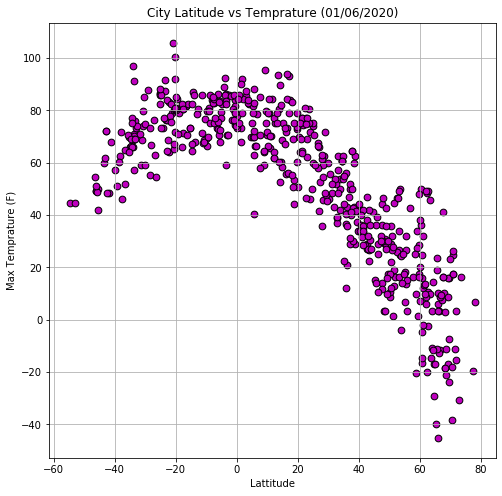

In [10]:
#Plot the latitude vs the max temp
tempplt = weather_data.plot.scatter( x = "Latitude", y = "Max Temp", grid = True, figsize = (8,8), \
                                   s = 45, c = "m", edgecolors = "k", \
#All dates appear to be the same grab the single date and add it to the title
                                   title = "City Latitude vs Temprature (" + str(weather_date[0]) + ")"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Max Temprature (F)")
#Save the plot
plt.savefig("Output_Files/Plots/LATvsTemp.png")
plt.show()

### Latitude vs. Humidity Plot

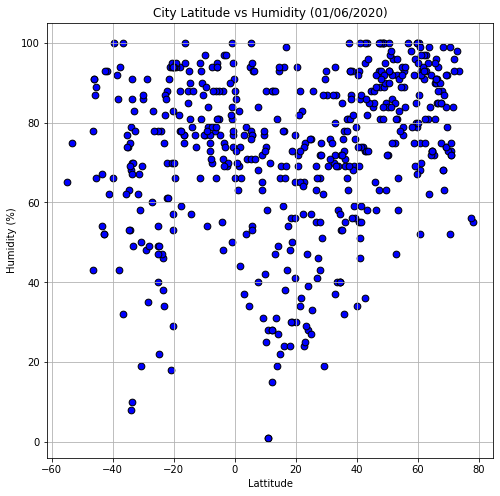

In [11]:
#Plot the latitude vs the humidity
humidplt = weather_data.plot.scatter( x = "Latitude", y = "Humidity", grid = True, figsize = (8,8), \
                                   s = 45, c = "b", edgecolors = "k", \
#All dates appear to be the same grab the single date and add it to the title
                                    title = "City Latitude vs Humidity (" + str(weather_date[0]) + ")"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Humidity (%)")
#Save the plot
plt.savefig("Output_Files/Plots/LATvsHumidity.png")
plt.show()


### Latitude vs. Cloudiness Plot

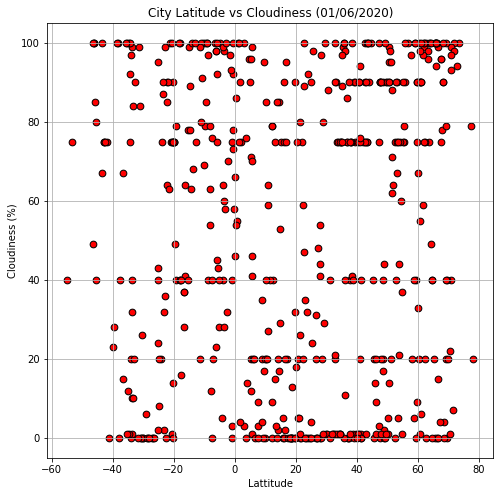

In [12]:
#Plot the latitude vs the cloudiness
cloudplt = weather_data.plot.scatter( x = "Latitude", y = "Cloudiness", grid = True, figsize = (8,8), \
                                   s = 45, c = "r", edgecolors = "k", \
#All dates appear to be the same grab the single date and add it to the title
                                   title = "City Latitude vs Cloudiness (" + str(weather_date[0]) + ")"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Cloudiness (%)")
#Save the plot
plt.savefig("Output_Files/Plots/LATvsCloud.png")
plt.show()

### Latitude vs. Wind Speed Plot

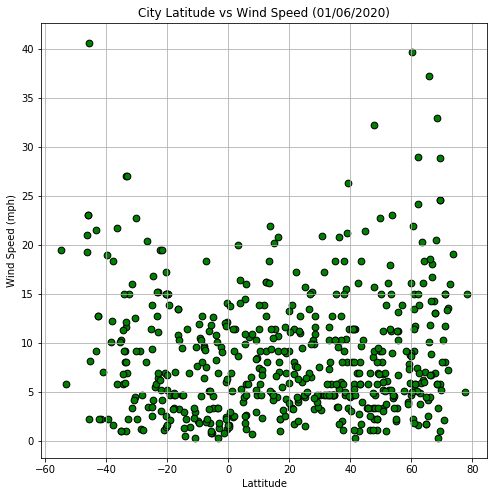

In [13]:
#Plot the latitude vs the wind speed
windplt = weather_data.plot.scatter( x = "Latitude", y = "Wind Speed", grid = True, figsize = (8,8), \
                                   s = 45, c = "g", edgecolors = "k", \
#All dates appear to be the same grab the single date and add it to the title
                                    title = "City Latitude vs Wind Speed (" + str(weather_date[0]) + ")"). \
                                    set(xlabel = "Lattitude" ,ylabel = "Wind Speed (mph)")
#Save the plot
plt.savefig("Output_Files/Plots/LATvsWNDSPD.png")
plt.show()

### Data Analysis
---
* Based on the data set the cities further in the northern hemisphere are colder than the ones in the southern. This is likely because there are possibly less populus cities in the south hemisphere vs the north. However when comparing the -60 Lat vs 60 Lat the temprature difference is evident.  
* The humidity percentace variance decreases as the cities move further away from the equator.
* The cities in the further north of the hemisphere appear to have higher windspeed variance.